In [53]:
import perceval as pv 
from perceval.components import BS, PS
from perceval.rendering.circuit import SymbSkin, PhysSkin
import perceval.components.unitary_components as comp
from perceval.utils import BasicState, DensityMatrix
import numpy as np
from circuits import addPrep, deAddPrep, fullCircuit
from utils import get_state_vector, run_circuit, loss_function, getFidelityRho1, getFidelityRho2, getFidelityRho
from collections import Counter
import matplotlib.pyplot as plt
from scipy.optimize import minimize

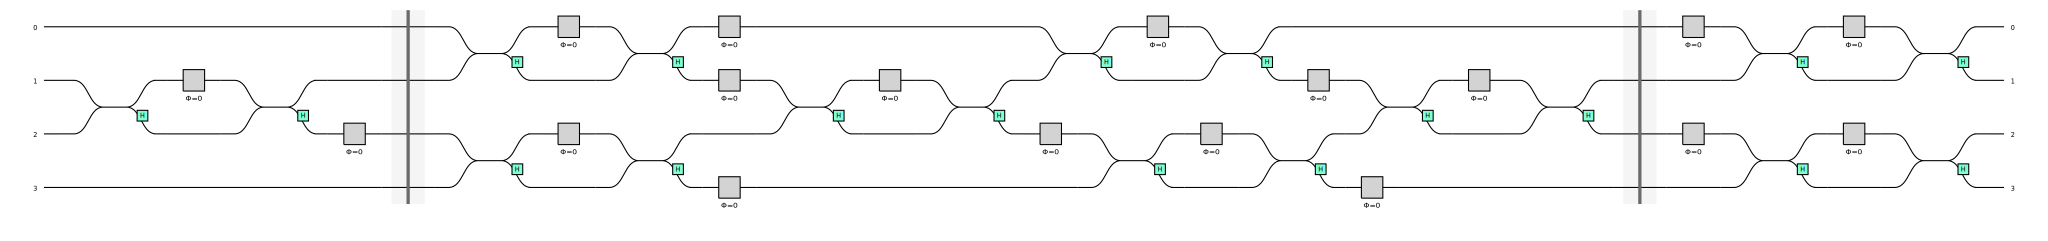

In [54]:
theta = 0
phi = 0
full_qc = fullCircuit([0]*12, theta, phi)
pv.pdisplay(full_qc, skin=SymbSkin())

In [55]:
sol = minimize(loss_function, method= 'Nelder-Mead', x0=np.random.rand(1,12)[0]*2*np.pi, options={"maxiter":650})

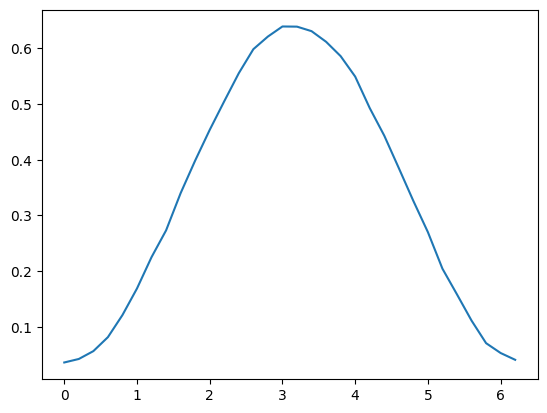

In [56]:
phi_list = np.arange(0, 2*np.pi, 0.2)
fid_phi = []

for phi in phi_list:
    optimized_qc = fullCircuit(sol.x, theta, phi)
    counts = run_circuit(pv.StateVector([1,0,1,0]), optimized_qc)

    fid_phi.append(getFidelityRho1(counts))
    # pv.pdisplay(optimized_qc, skin=SymbSkin())

plt.plot(phi_list, fid_phi)


In [57]:
print(sol)
counts = run_circuit(pv.StateVector([1,0,1,0]), optimized_qc)

getFidelityRho1(counts)

       message: Maximum number of iterations has been exceeded.
       success: False
        status: 2
           fun: 4.53538134
             x: [ 3.835e+00  5.637e-01  6.261e+00  4.999e+00  6.173e+00
                  7.698e-01  8.005e-01  3.998e-01  9.556e-01  3.668e+00
                  2.979e+00  3.141e+00]
           nit: 650
          nfev: 1985
 final_simplex: (array([[ 3.835e+00,  5.637e-01, ...,  2.979e+00,
                         3.141e+00],
                       [ 3.835e+00,  5.637e-01, ...,  2.979e+00,
                         3.141e+00],
                       ...,
                       [ 3.835e+00,  5.637e-01, ...,  2.979e+00,
                         3.141e+00],
                       [ 3.835e+00,  5.637e-01, ...,  2.979e+00,
                         3.141e+00]]), array([ 4.535e+00,  4.550e+00, ...,  4.580e+00,  4.583e+00]))


0.0395

In [58]:
get_state_vector(pv.StateVector([1,0,1,0]), optimized_qc)

(0.041-0.185I)*|1,0,0,1>+(-0.003-0.058I)*|1,0,1,0>+(-0.669+0.436I)*|0,1,1,0>+(0.024-0.043I)*|0,1,0,1>+(0.014-0.013I)*|0,0,0,2>+(0.025-0.071I)*|0,2,0,0>+(-0.344-0.044I)*|0,0,1,1>+(-0.058-0.04I)*|0,0,2,0>+(-0.202-0.383I)*|1,1,0,0>+(0.03-0.013I)*|2,0,0,0>